In [1]:
from dataObject import *

In [2]:
# 初始化ds，处理数据
ds = DataSet("sample_practice.in")

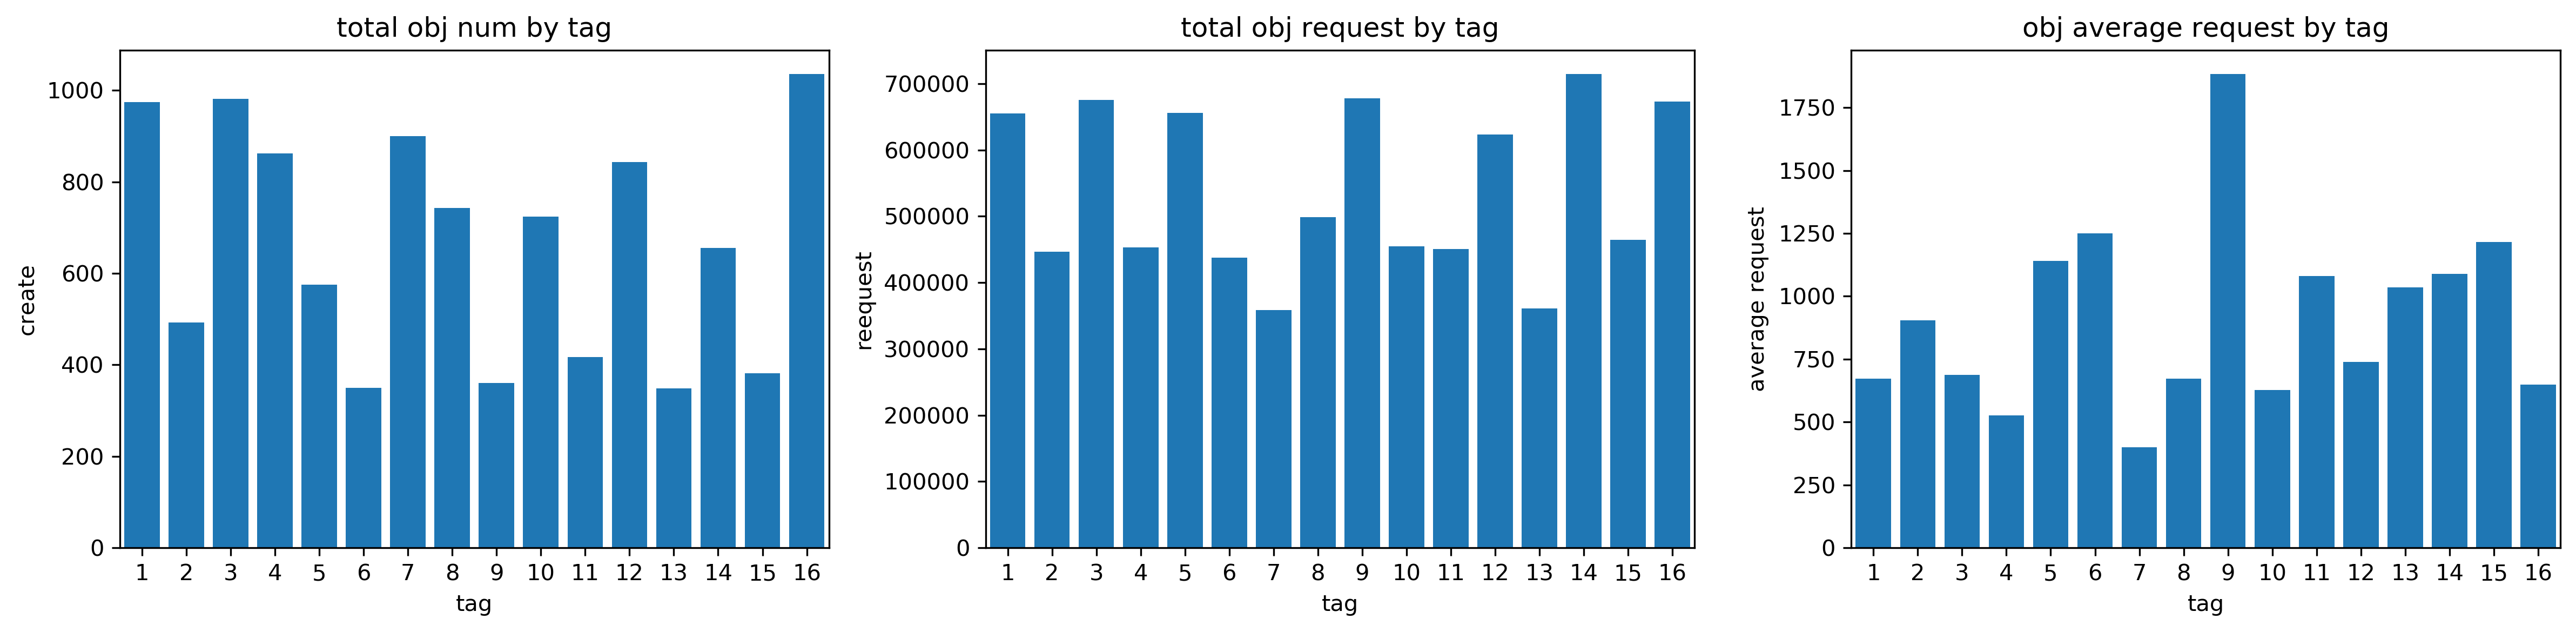

In [25]:
# 验证每个对象id只对应一个对象（即对象id不会轮转复用）
maxLen = 1
for key,objList in ds.objDict.items():
    assert(maxLen == len(objList))
    
plt.figure(figsize=(16, 4), dpi=300)
# 绘制每个tag的总存储对象数量

taglist = [i+1 for i in range(ds.TAGNUM)]
createdata = ds.getNumDivideByTag()
requestdata = []
averagedata = []
for i in range(ds.TAGNUM):
    tag = i+1
    sum = 0
    for obj in ds.tagToObjList[tag]:
        sum += len(obj.requestTmList)
    requestdata.append(sum)
    averagedata.append(requestdata[i]/createdata[i])

alldata = [createdata, requestdata, averagedata]
ylabels = ["create", "reequest", "average request"]
titles = ["total obj num by tag", "total obj request by tag", "obj average request by tag"]
for sub in range(3):
    plt.subplot(1, 3, sub+1)
    plt.bar(taglist, alldata[sub])
    plt.xlabel("tag")
    plt.xlim(0.5, ds.TAGNUM+0.5)
    plt.xticks(taglist)
    plt.ylabel(ylabels[sub])
    plt.title(titles[sub])
    plt.tight_layout()

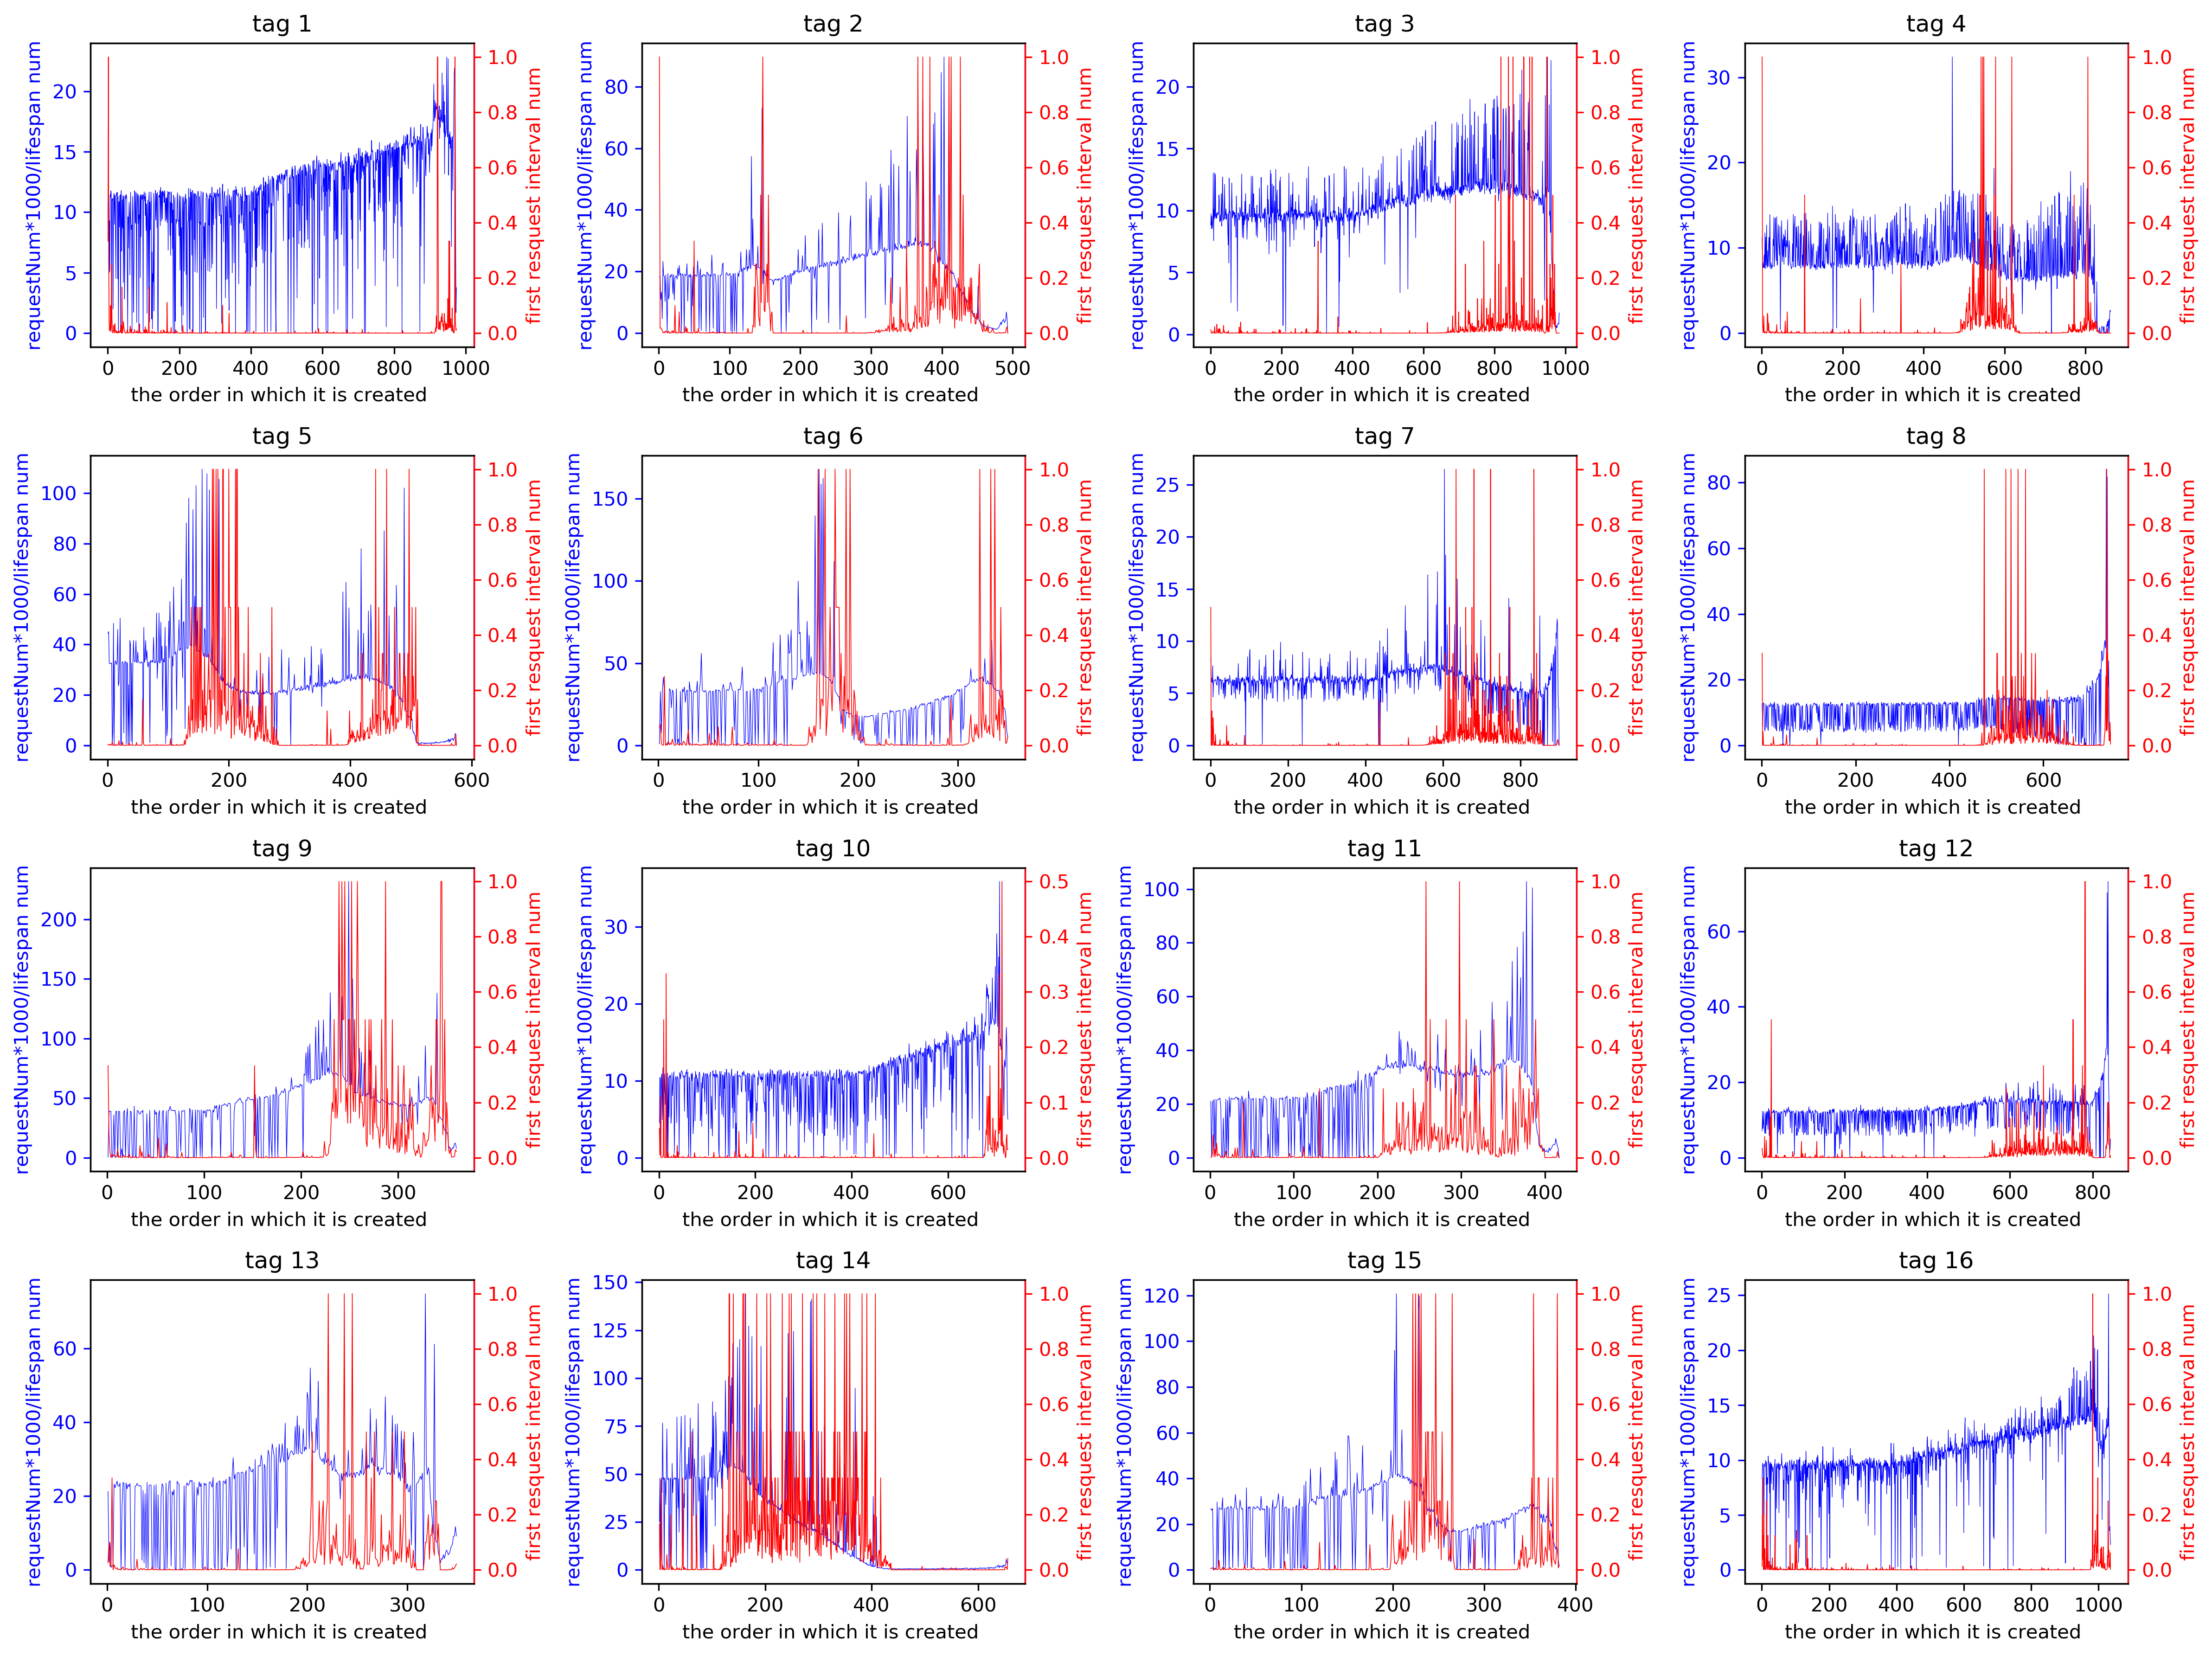

In [ ]:
#同一tag内所有对应对象的 请求数量*1000.0/生命周期, 以及对象的最快请求间隔倒数。
plt.figure(figsize=(16, 12), dpi=300)
for tag in range(1, ds.TAGNUM+1):
    axis = plt.subplot(4, 4, tag)
    axis.set_xlabel('the order in which it is created ')

    objList = ds.getObjListByTag(tag)
    #注意，会有对象刚被创建就被请求的情况！！！
    requestOnCreate = []
    for obj in objList:
        if(len(obj.requestTmList) and obj.requestTmList[0]==obj.createTime):
            requestOnCreate.append(obj.objId)
    
    objNum = [i+1 for i in range(len(objList))]
    data1 = [(len(obj.requestTmList)*1000.0)/obj.getLifeSpan() for obj in objList]
    data2 = [1/(obj.requestTmList[0]-obj.createTime+1) if(len(obj.requestTmList)) else 0 for obj in objList]#首次响应间隔倒数
    colors = ['blue', 'red']
    lineWidth = [0.3, 0.4]
    axisLabels = ['requestNum*1000/lifespan', 'first resquest interval']
    dataInfo = [None for _ in range(2)]
    data = [data1, data2]
    for tp in range(2):
        dataInfo[tp] = dataListInfo(data[tp], color=colors[tp], axisLabel=axisLabels[tp], lineWidth=lineWidth[tp])
    doubleYPlot(objNum, dataInfo[0], dataInfo[1], axis)
    plt.tight_layout()
    plt.title('tag {}'.format(tag))
    plt.plot()

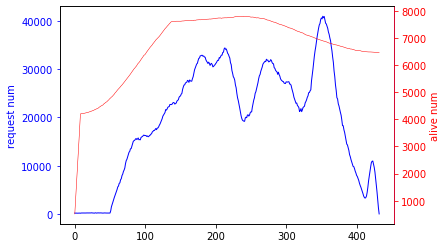

In [ ]:
# 绘制每interval个时间步内的请求数量及存储对象累积存活数量
plt.figure()
interval = 200
type = ['request', 'alive']
colors = ['blue', 'red']
lineWidth = [1, 0.5]
dim = int((ds.TOLTIME-1)/interval)+1

timelist = [i for i in range(dim)]
dataInfo:List[dataListInfo]=[None for _ in range(2)]
for tp in range(2):
    data = ds.timeBucketNum(interval, type[tp])
    dataInfo[tp] = dataListInfo(data, color=colors[tp], axisLabel=type[tp], lineWidth=lineWidth[tp])

axis = plt.subplot()
axis.set_xlabel('time(multiplies {})'.format(interval))
doubleYPlot(timelist, dataInfo[0], dataInfo[1])

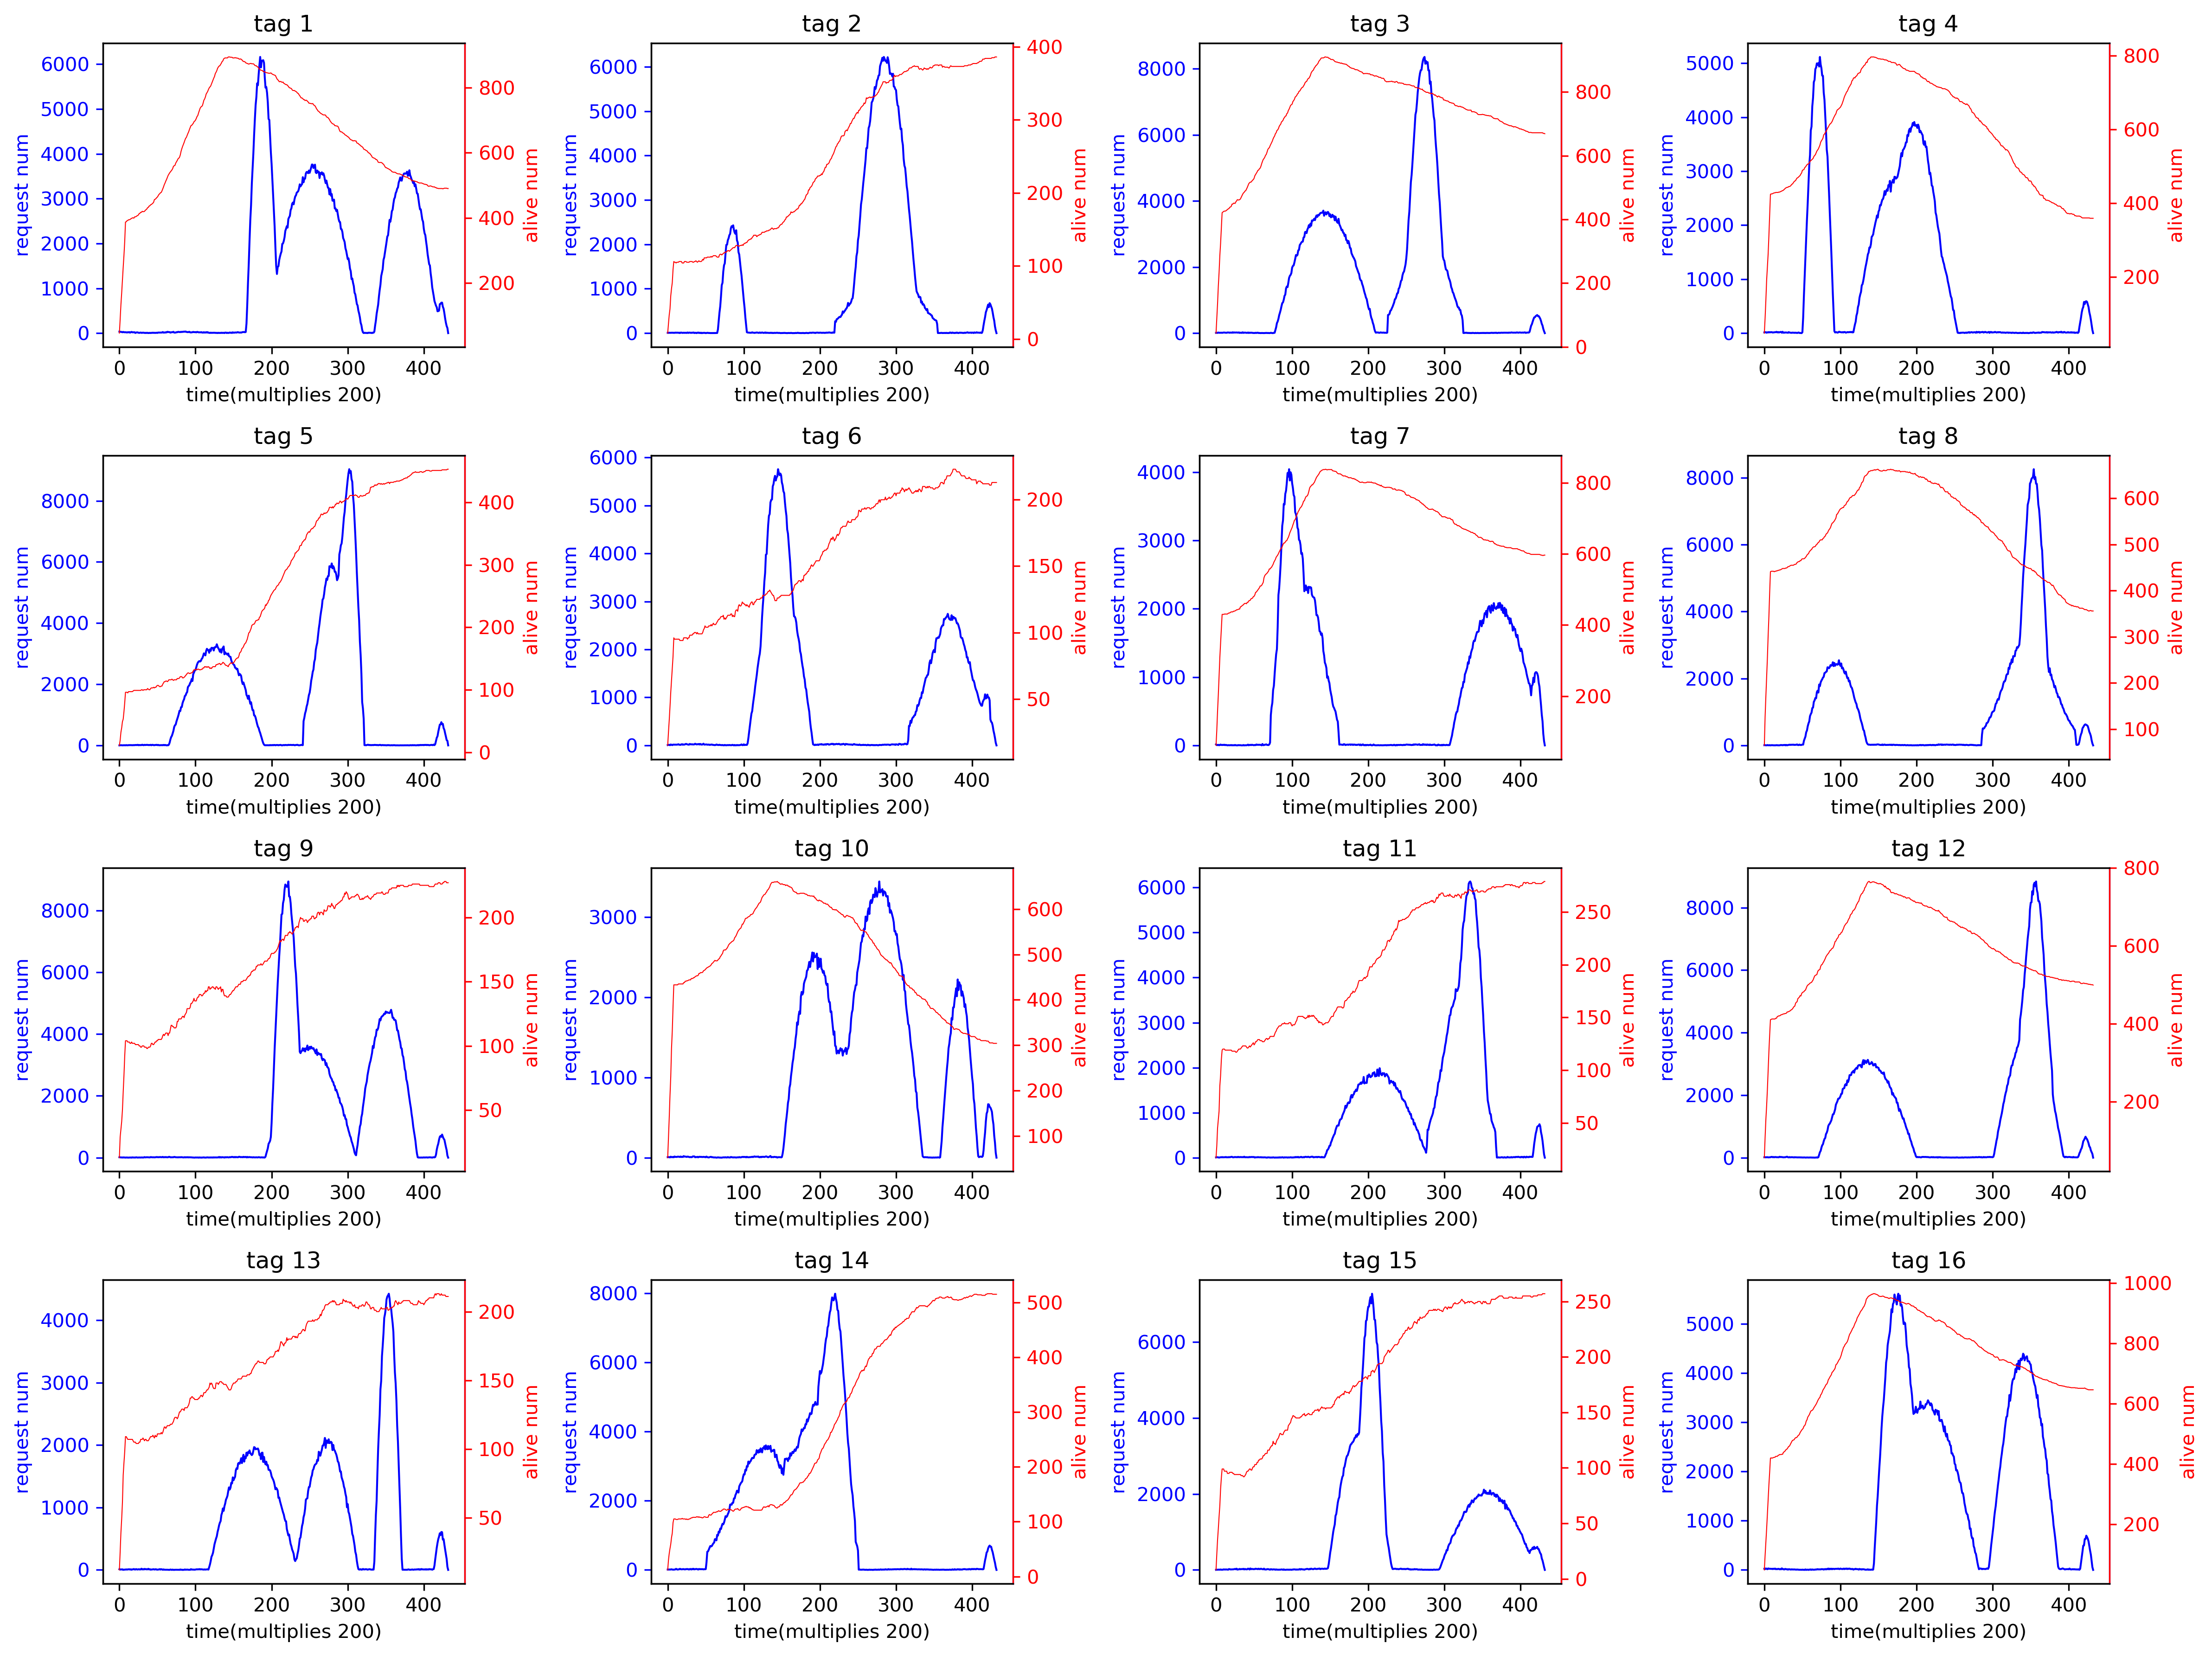

In [5]:

# 分别绘制每个tag的
plt.figure(figsize=(16, 12), dpi=300)
for i in range(ds.TAGNUM):
    axis = plt.subplot(4, 4, i+1)
    axis.set_xlabel('time(multiplies {})'.format(interval))
    
    dataInfo = [None for _ in range(2)]
    for tp in range(2):
        data = ds.timeBucketNumByTag(interval, i+1, type[tp])
        dataInfo[tp] = dataListInfo(data, color=colors[tp], axisLabel=type[tp], lineWidth=lineWidth[tp])
    doubleYPlot(timelist, dataInfo[0], dataInfo[1], axis)
    plt.xlabel('time(multiplies {})'.format(interval))
    plt.tight_layout()
    plt.title('tag {}'.format(i+1))
    plt.plot()
# 显示图形
plt.show()

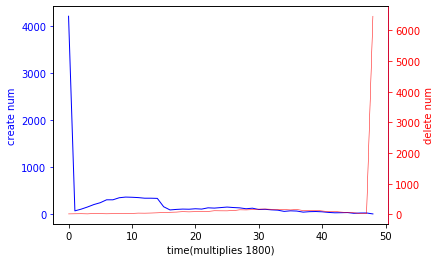

In [6]:
# 绘制每interval个时间步内的存储对象创建数量和删除数量
interval = 1800
type = ['create', 'delete']
colors = ['blue', 'red']
lineWidth = [1, 0.5]
dim = int((ds.TOLTIME-1)/interval)+1

timelist = [i for i in range(dim)]
dataInfo:List[dataListInfo]=[None for _ in range(2)]
for tp in range(2):
    data = ds.timeBucketNum(interval, type[tp])
    dataInfo[tp] = dataListInfo(data, color=colors[tp], axisLabel=type[tp], lineWidth=lineWidth[tp])
axis = plt.subplot()
axis.set_xlabel('time(multiplies {})'.format(interval))
doubleYPlot(timelist, dataInfo[0], dataInfo[1], axis)

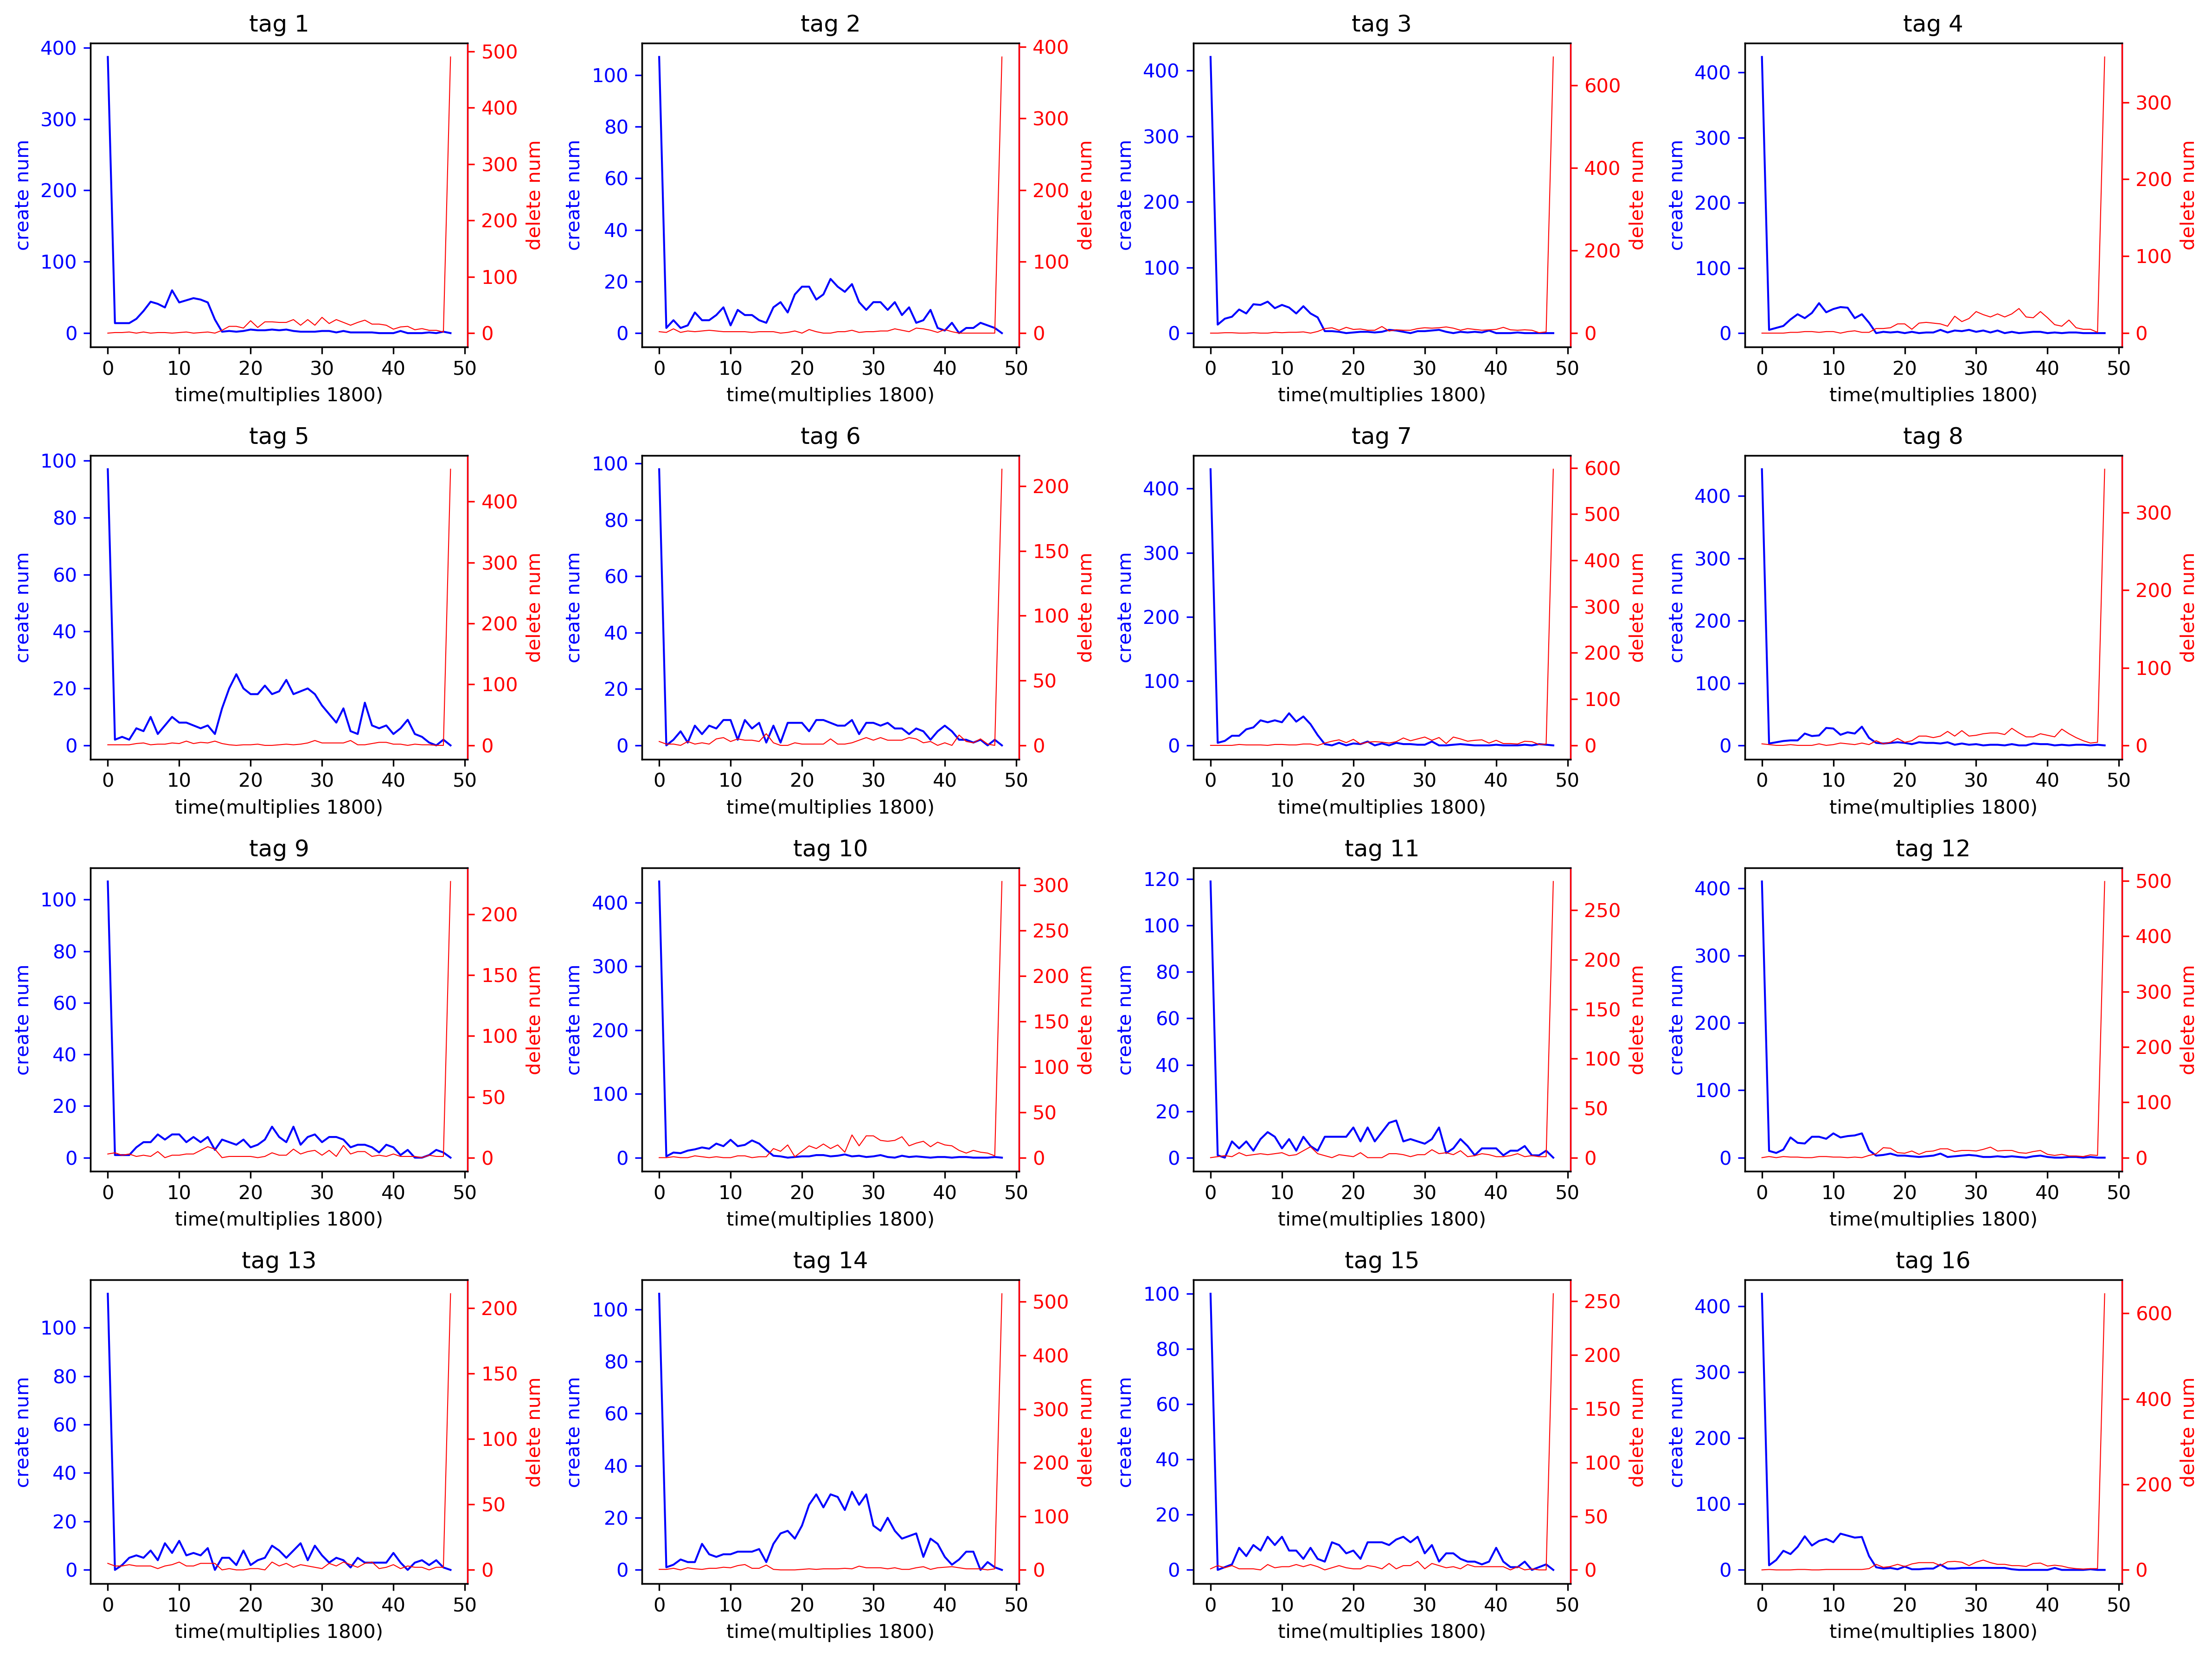

In [7]:
# 分别绘制每个tag的
plt.figure(figsize=(16, 12), dpi=300)
for i in range(ds.TAGNUM):
    axis = plt.subplot(4, 4, i+1)
    axis.set_xlabel('time(multiplies {})'.format(interval))
    
    dataInfo = [None for _ in range(2)]
    for tp in range(2):
        data = ds.timeBucketNumByTag(interval, i+1, type[tp], 1)
        dataInfo[tp] = dataListInfo(data, color=colors[tp], axisLabel=type[tp], lineWidth=lineWidth[tp])
    doubleYPlot(timelist, dataInfo[0], dataInfo[1], axis)
    plt.tight_layout()
    plt.title('tag {}'.format(i+1))
    plt.plot()
# 显示图形
plt.show()

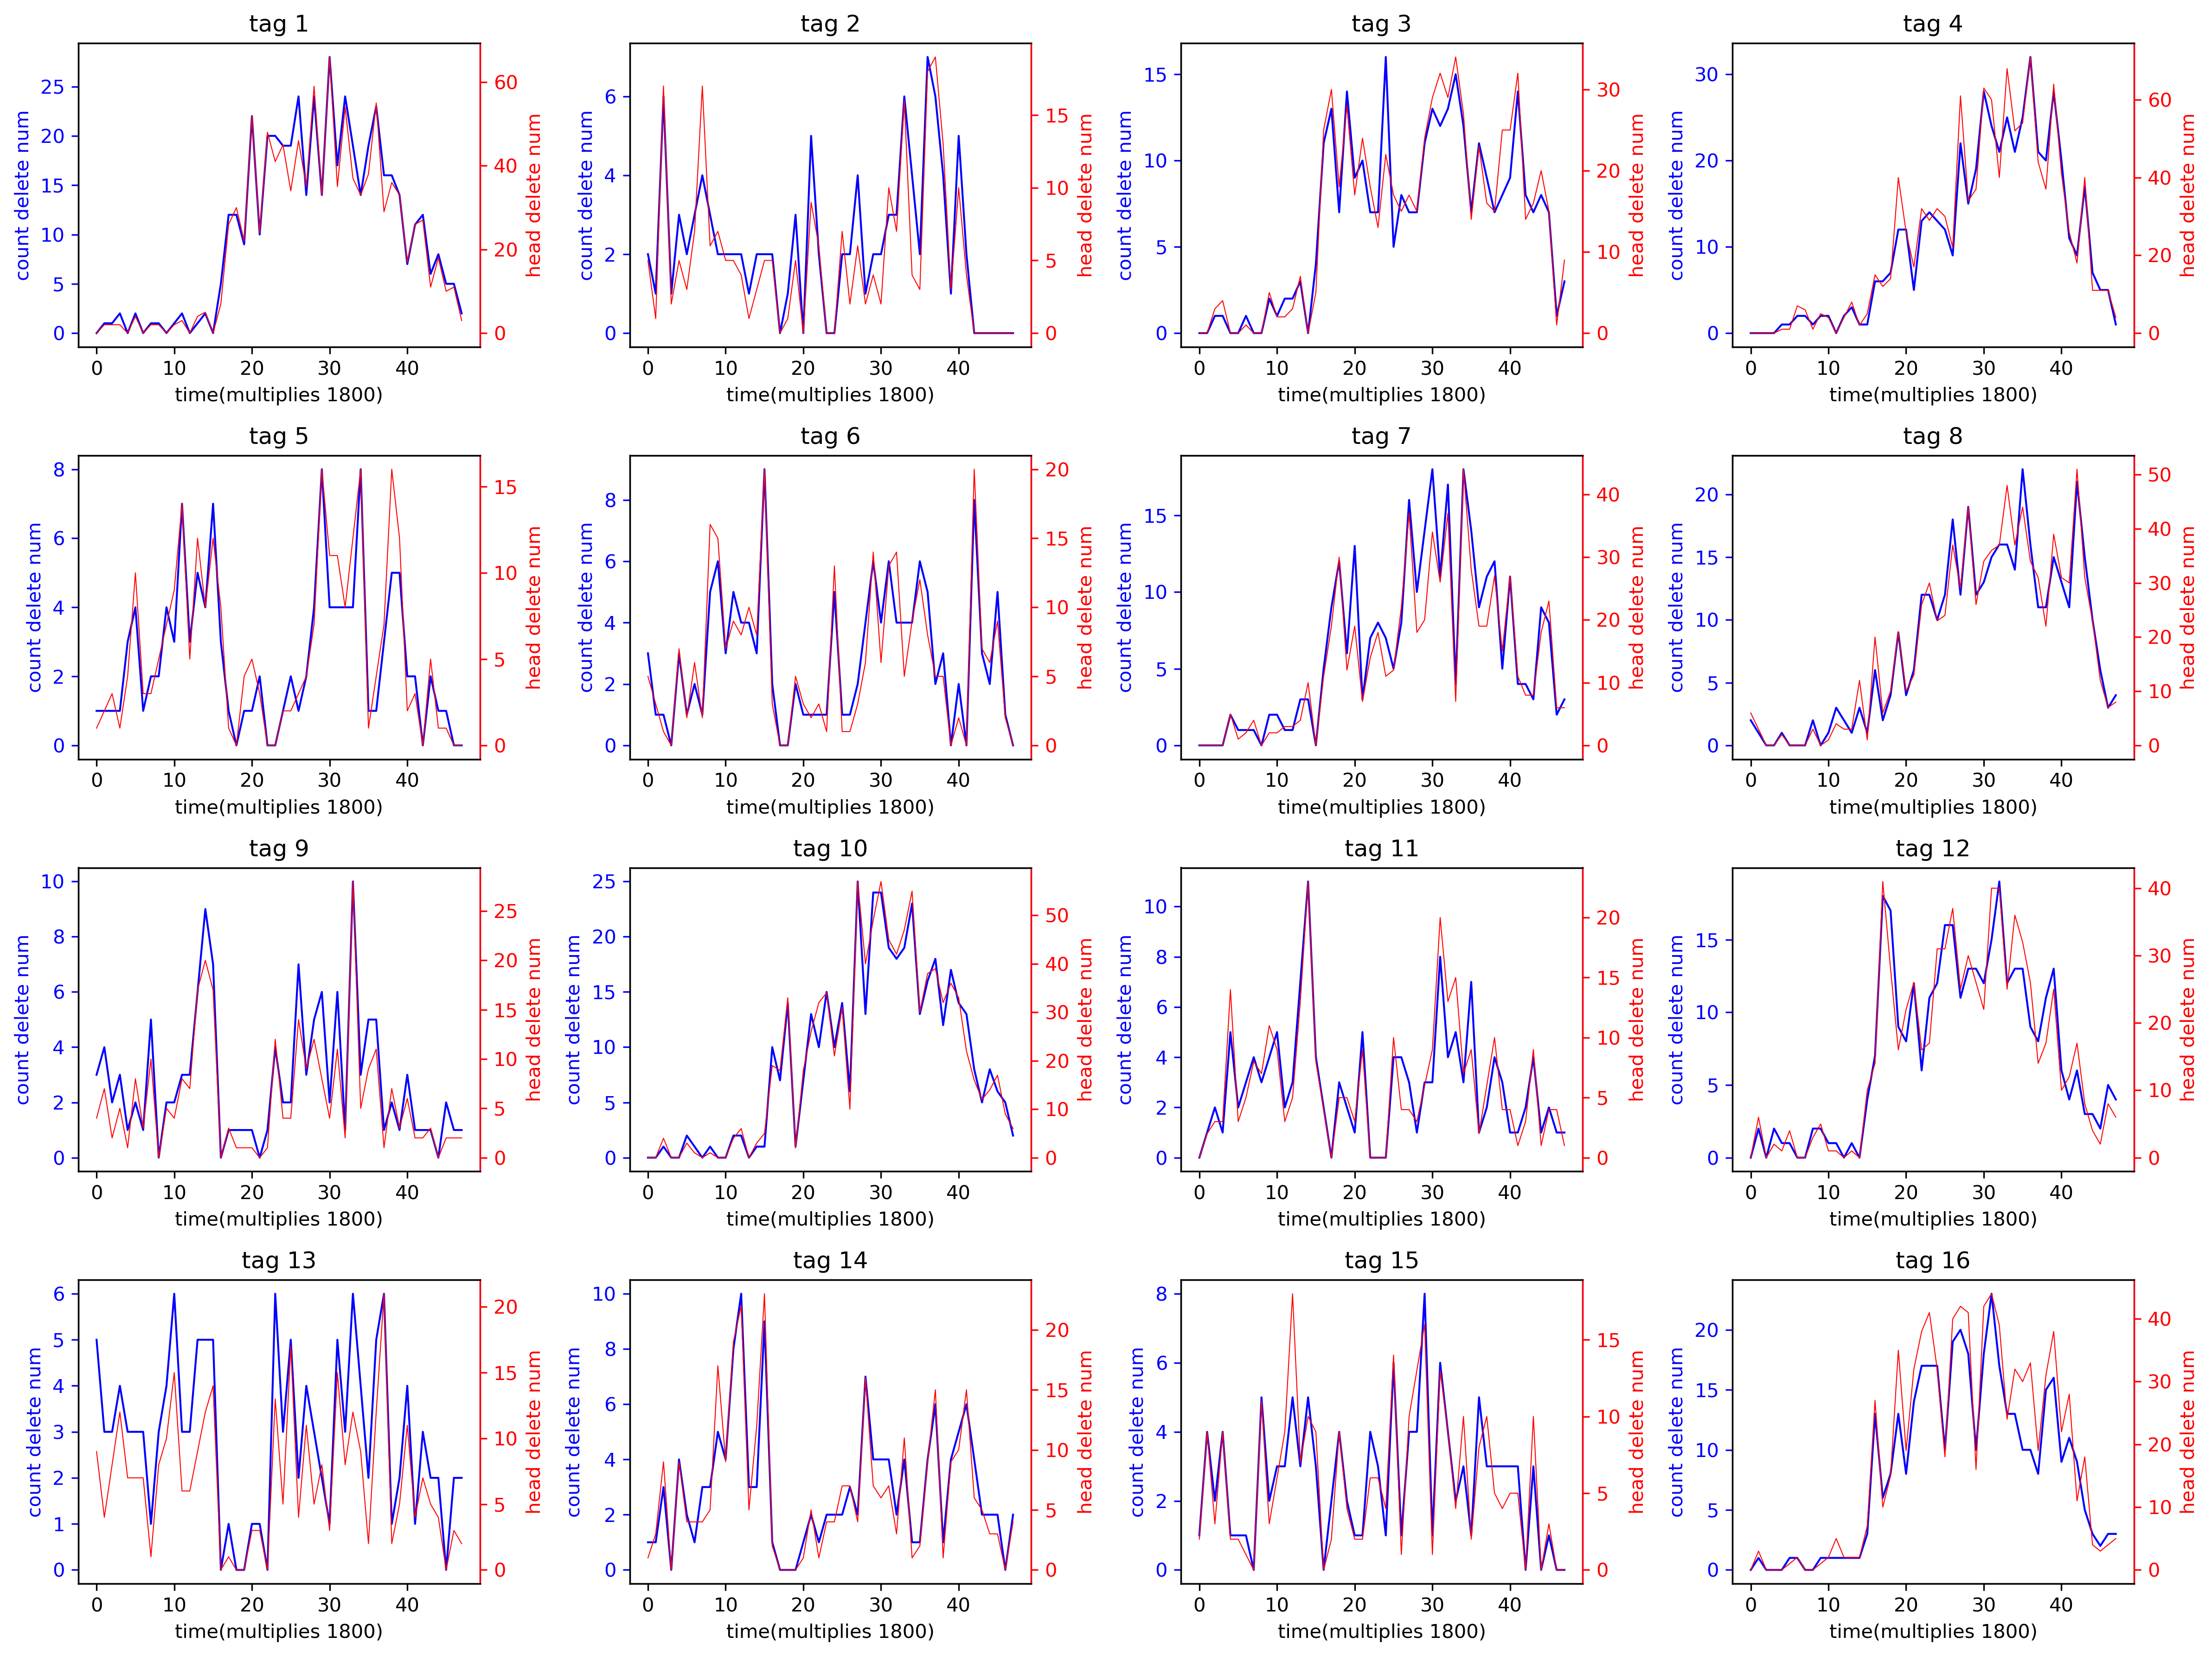

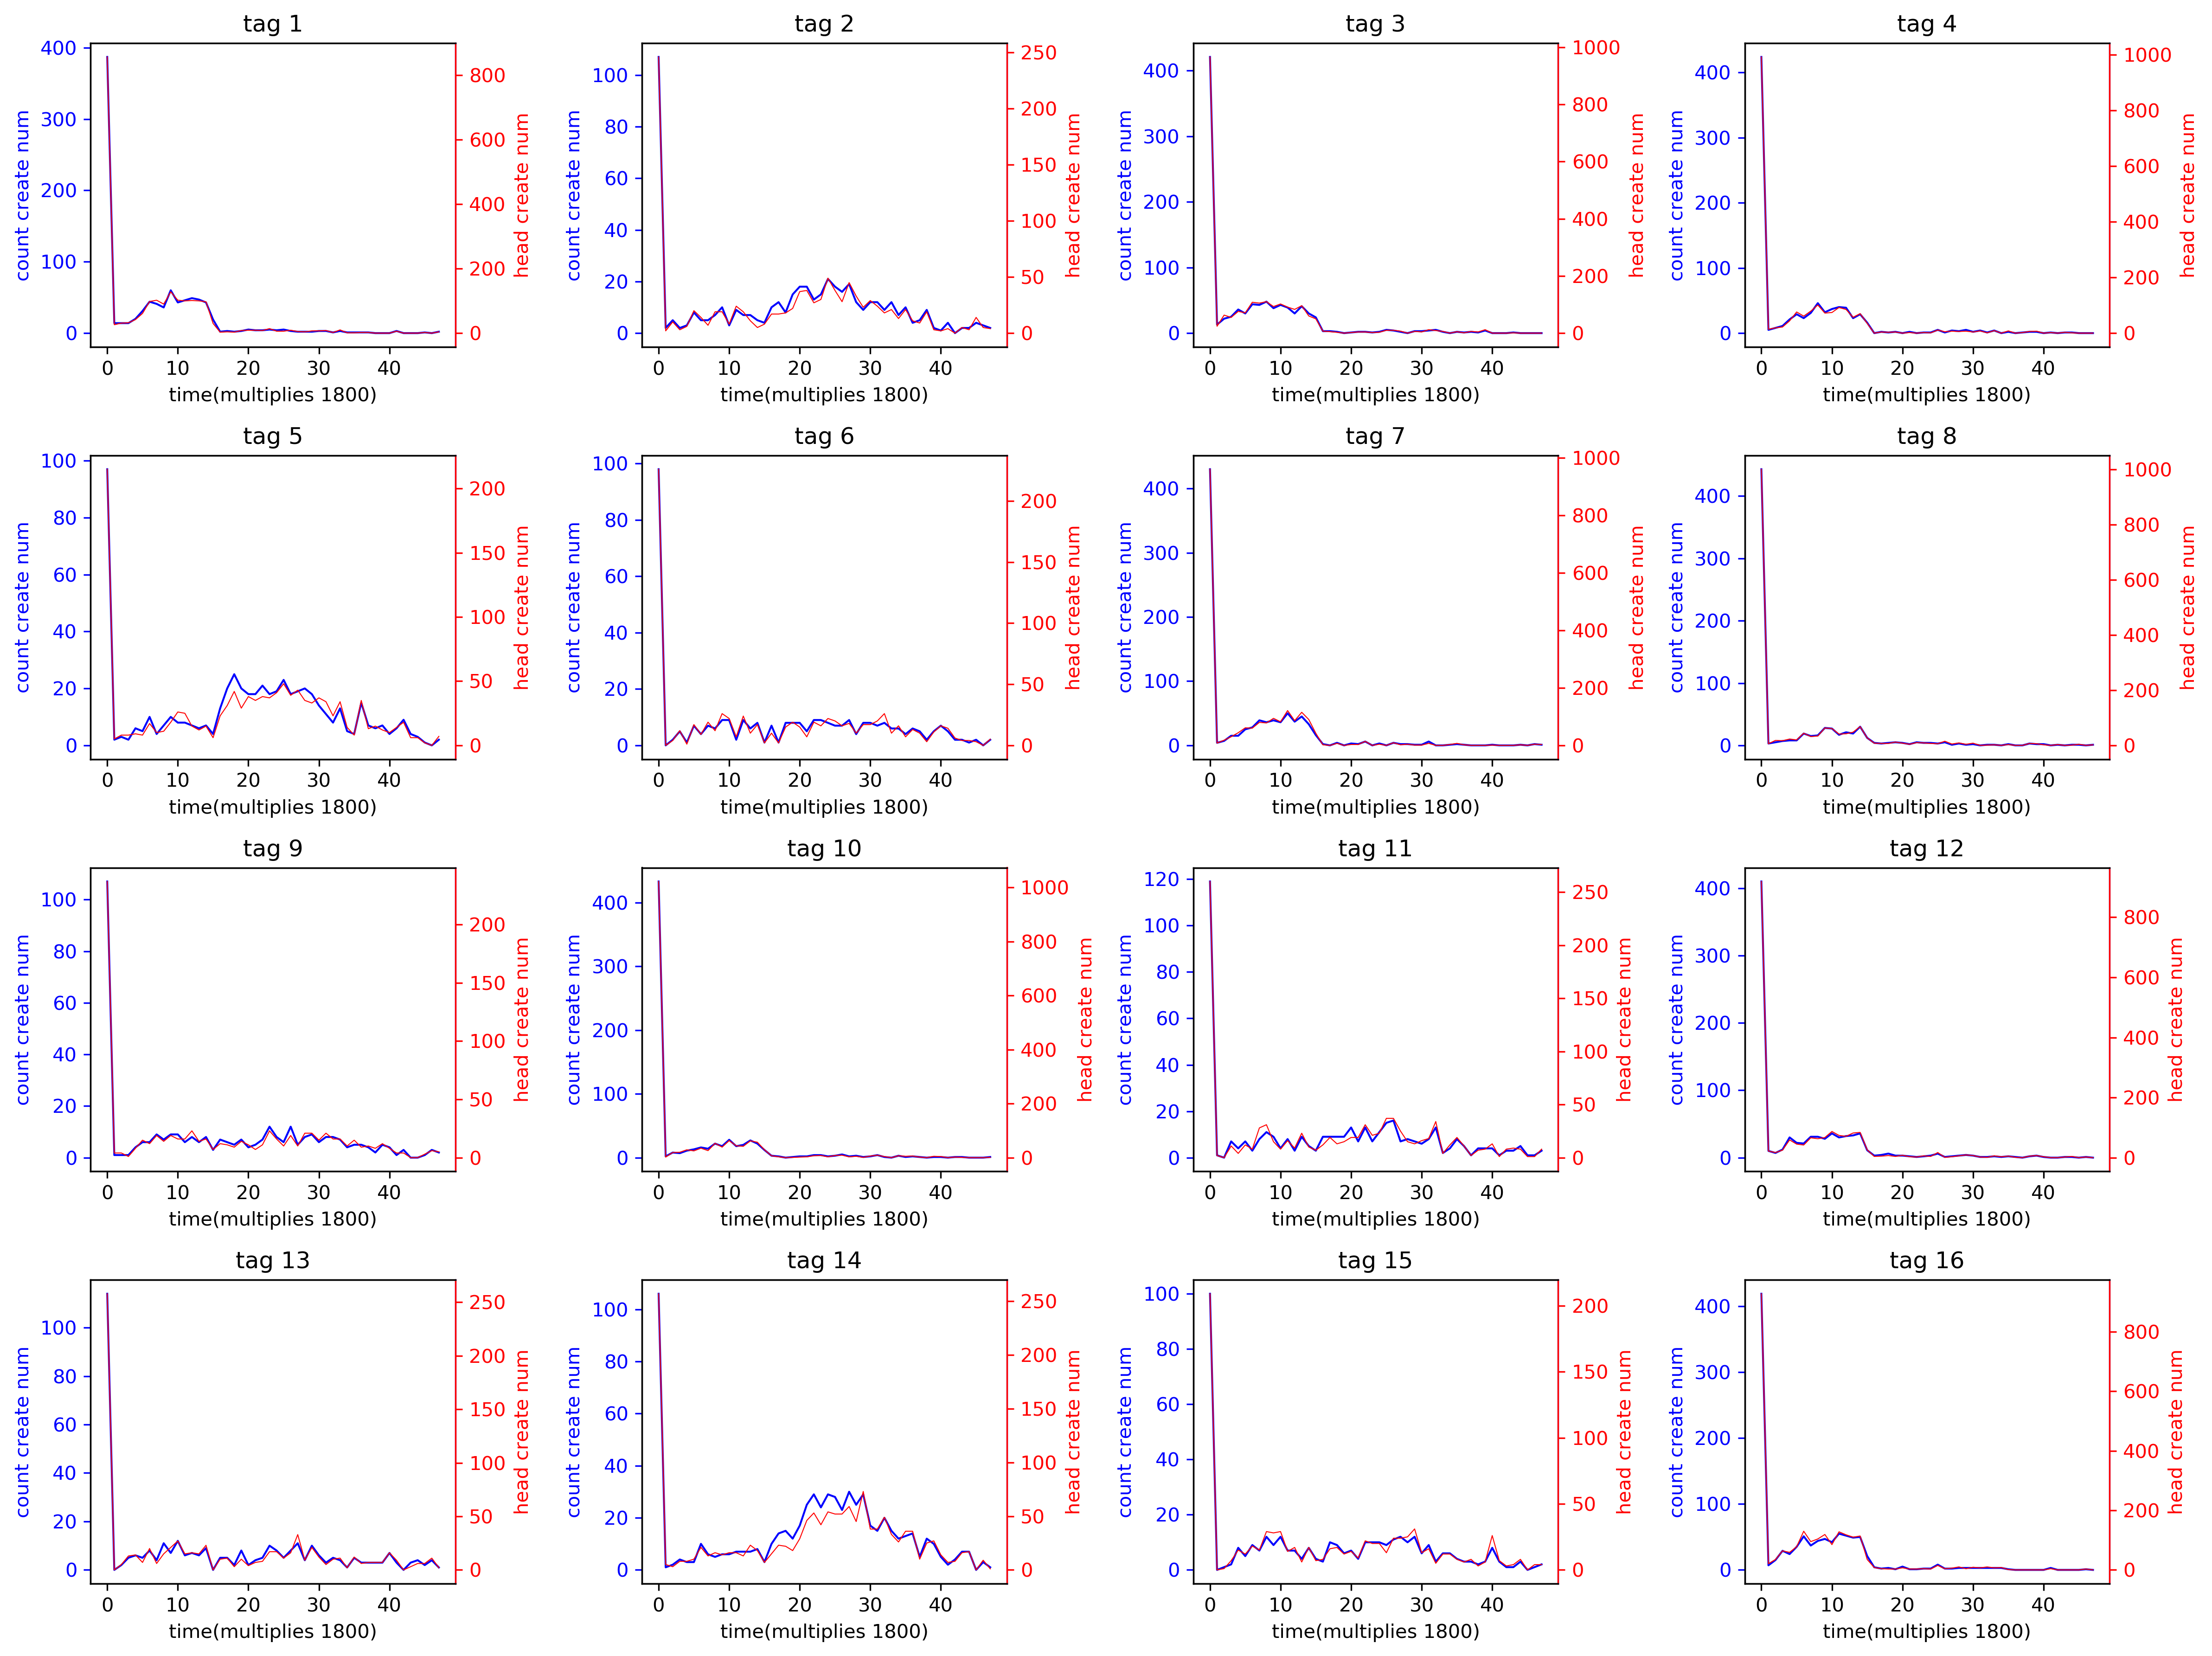

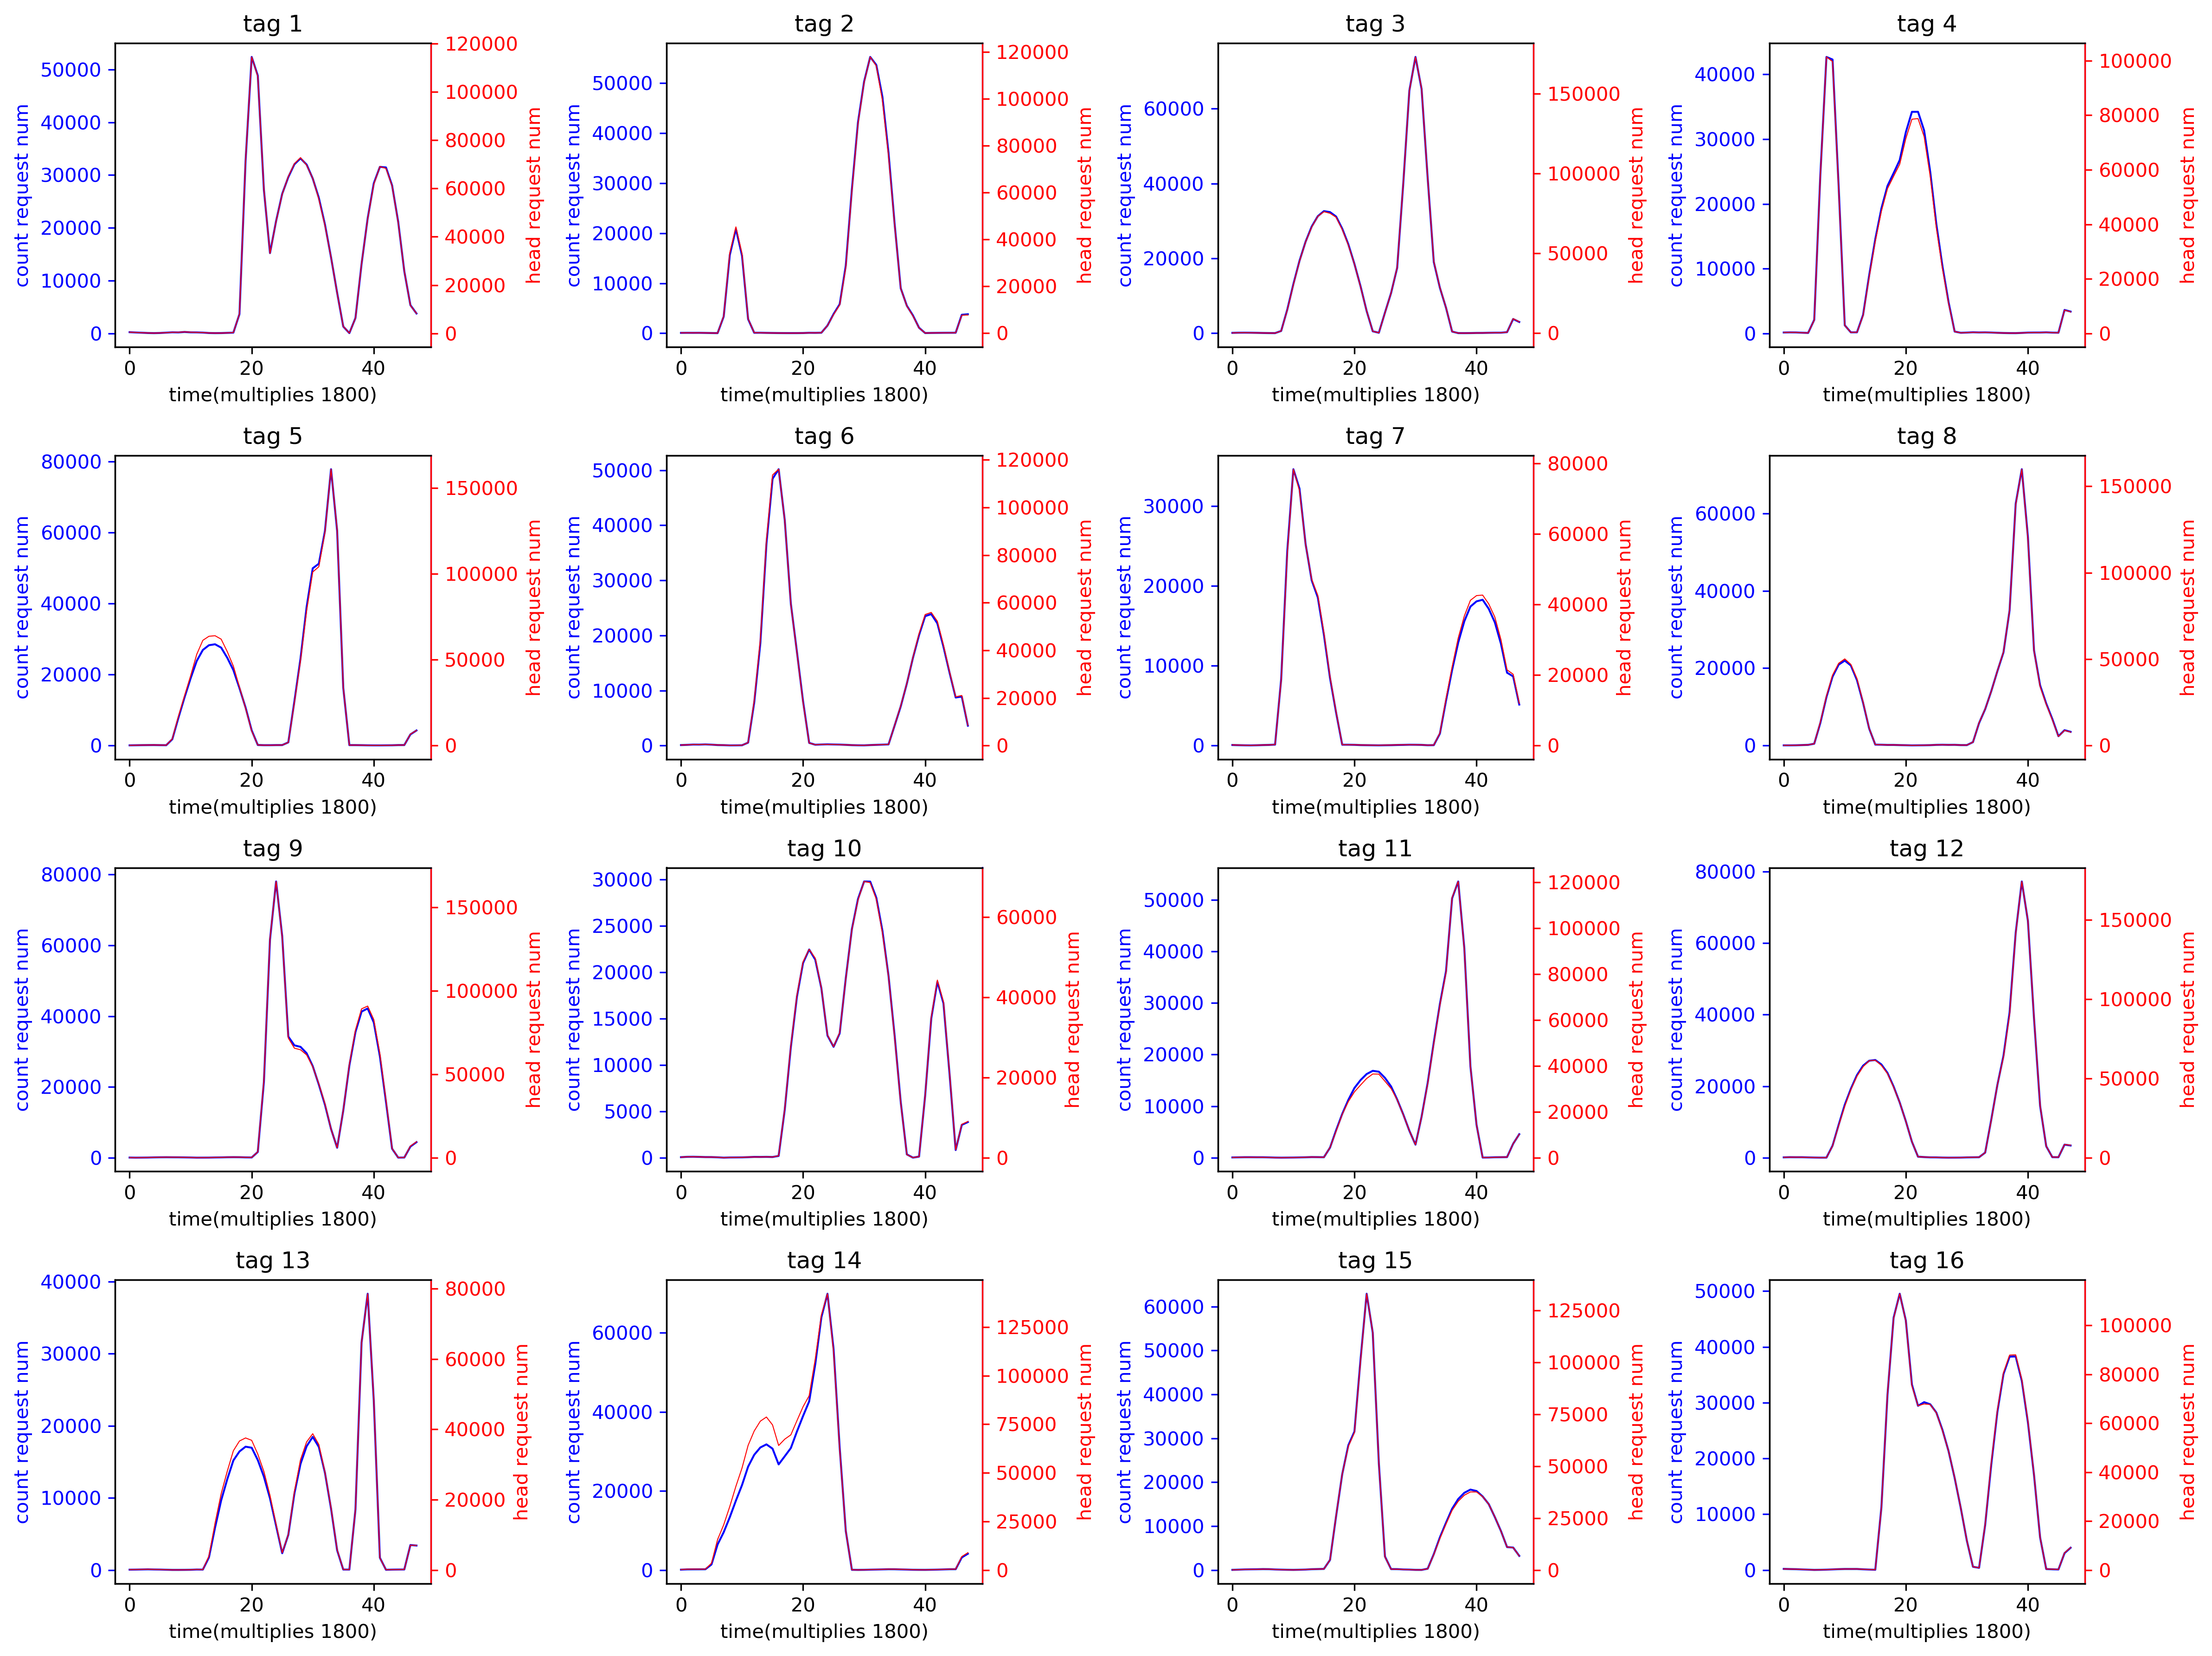

In [ ]:
#对比数据集头部给出数据和统计数据集所得数据
#数据集头部每行应该给出ceil((86400+105)/1800)=49个数据，但实际只给出86400/1800=48个数据。
interval = 1800
ftype = ['delete', 'create', 'request']
headData = [ds.tagToDelNumList, ds.tagToWrtNumList, ds.tagToReqNumList]

colors = ['blue', 'red']
lineWidth = [1, 0.5]
dim = int((ds.TOLTIME-1)/interval)+1

timelist = [i for i in range(dim)]
timelist.pop()#题目没给够数据，这里是为了适配题目所给数据。
for ftp in range(3):
    plt.figure(figsize=(16, 12), dpi=300)
    for i in range(ds.TAGNUM):
        axis = plt.subplot(4, 4, i+1)
        axis.set_xlabel('time(multiplies {})'.format(interval))
        
        type = ['count '+ftype[ftp] ,'head '+ftype[ftp]]
        data = ds.timeBucketNumByTag(interval, i+1, ftype[ftp])
        data.pop()#题目没给够数据，这里是为了适配题目所给数据。
        dataL = [data, headData[ftp][i+1]]
        for tp in range(2):
            dataInfo[tp] = dataListInfo(dataL[tp], color=colors[tp], axisLabel=type[tp], lineWidth=lineWidth[tp])
        doubleYPlot(timelist, dataInfo[0], dataInfo[1], axis)
        plt.tight_layout()
        plt.title('tag {}'.format(i+1))
        plt.plot()
    # 显示图形
    plt.show()